<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/StatsModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statsmodels
Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models as well as for conducting statistical tests and statistical data exploration. 
Time series data have several characteristics such as:
* Trends wich can be upward, horizontal/stationary, downward
* Seasonality -- repeating trends
* Cyclical -- trends with no set repetition 

# Filters

The Hodrick -Prescott filter separates a time series y_t into a trend component T_t and a cyclical  component c_t

*yt = T_t + c_t*



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('macrodata.csv', index_col = 0, parse_dates = True)

In [0]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


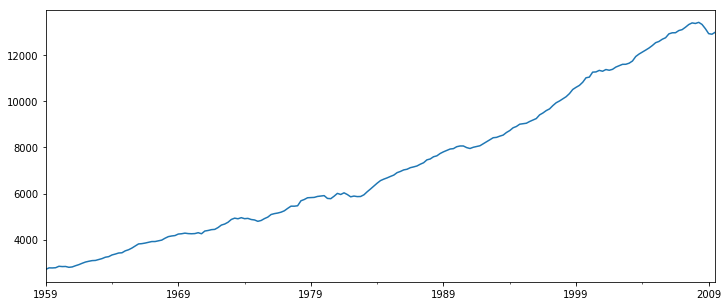

In [0]:
# plot 'realgdp'
df['realgdp'].plot(figsize = (12,5))

In [0]:
# import stats models timse series analysis
from statsmodels.tsa.filters.hp_filter import hpfilter

In [0]:
# apply Hodrickl -Prescott filter -- lambda value is the frequency of the data
# unpack the tuple by assigning to variables
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb= 16000)

In [0]:
type(gdp_trend)

pandas.core.series.Series

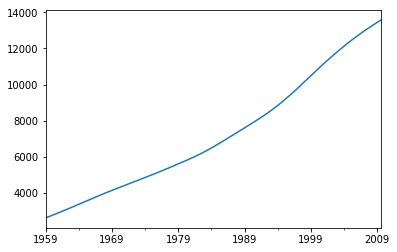

In [0]:
gdp_trend.plot()

In [0]:
# assign gpd_trend as a new column of the df
df['gdptrend'] = gdp_trend

In [0]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdptrend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2621.923591
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2658.622505
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2695.326945
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2732.049950
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2768.809567


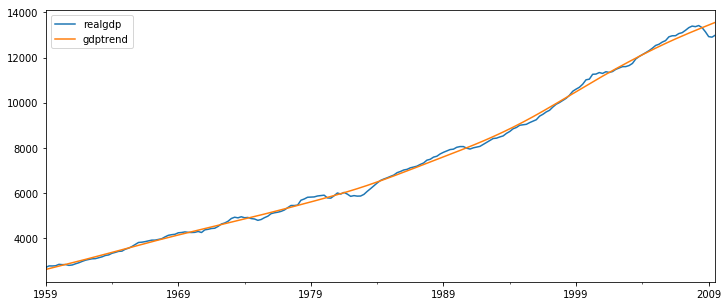

In [0]:
df[['realgdp', 'gdptrend']].plot(figsize = (12,5))

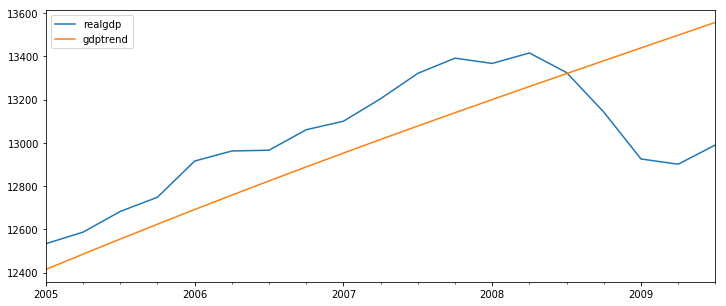

In [0]:
# zoom in
df[['realgdp', 'gdptrend']]['2005-01-01':].plot(figsize = (12,5))

# ETS Models
ETS stands for Error-Trend-Seasonality 


*   Exponential Smoothing
*   Trends Methods Models
*   ETS Decomposition

ETS Models will take each of those terms for smoothing and may add them, multiply them, or leave some of them out. Based on these factors we can create a model to fit our data.

### ETS Decopositins for Airline Passsengers

We can apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time.(adding a certain amount of passengers)
 A multiplicative model is more appropriate when we are increasing or decreasing at a non-linear rate (passengers doubling every year)

In [0]:
   # read rthe data
  airline = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
  airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
airline = airline.dropna()

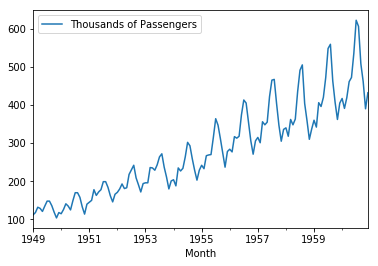

In [0]:
airline.plot()

The trend above seems to be increasing slightly higher than linear so it would be good to use a multiplicative model for this.

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

In [0]:
result

In [0]:
result.trend

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
1951-01-01    157.125000
1951-02-01    159.541667
1951-03-01    161.833333
1951-04-01    164.125000
1951-05-01    166.666667
1951-06-01    169.083333
                 ...    
1958-07-01    381.833333
1958-08-01    383.666667
1958-09-01    386.500000
1958-10-01    390.333333
1958-11-01    394.708333
1958-12-01    398.625000
1959-01-01    402.541667
1959-02-01    407.166667
1959-03-01    411.8

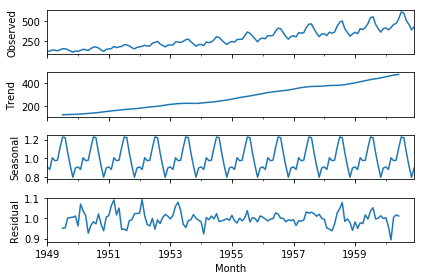

In [0]:
result.plot();

## Formatting the rc parameters to enhance the visualization

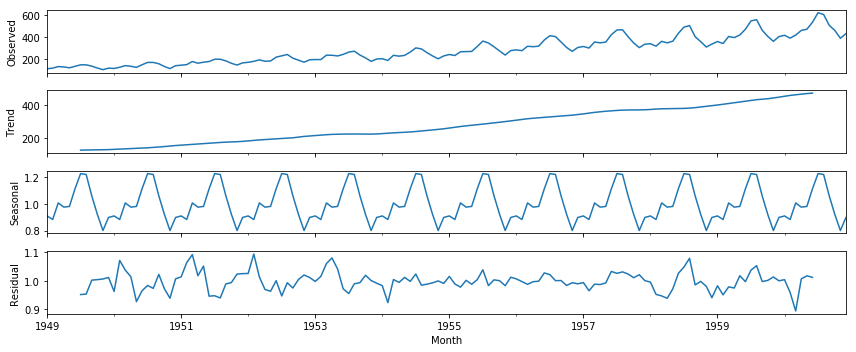

In [0]:
from pylab import rcParams

rcParams['figure.figsize'] = 12,5

result.plot();

## Exponentially Weighted Moving Averages Models (EWMA )

With a SMA the entire model is constrained  the same window size for all the data. EWMA puts more weight on recent data instead of having the same weight for all the data. 
Basic SMA has some weaknessess :

*   Smaller windows would lead to more noise rather than signal
*   Data/model will always lag by the size of the window.
*  It would never reach to the peak or valley of the data due to the averaging 
* It does not really inform us about possible future behavior, all it really does is describe trends in our data. 
* Extreme historical values can skew our data significantly. For instance-- if working with economic data, a dip can affect the model for the enterity of the window. 

EWMA can help us eliminate these issues as it will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently.

Let's code an example using the airplane dataset.



In [0]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
# drop na's
airline.dropna(inplace = True)

In [0]:
# convert index to datetime
airline.index = pd.to_datetime(airline.index)

In [0]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
# check index
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [0]:
# create a 6 month and 12 month SMA
airline['6 month SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12 month SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

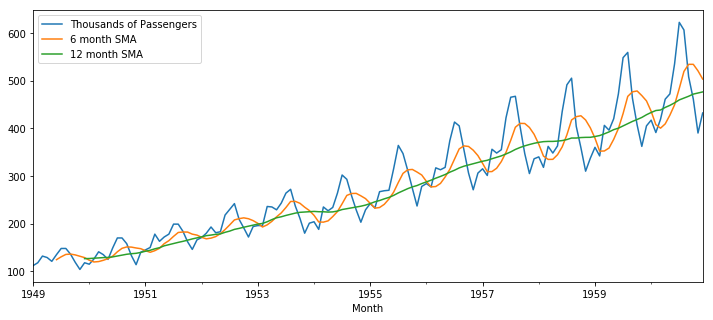

In [0]:
# plot it
airline.plot();

We can see the effects of lagging at the beginning of the graph above. We can fix that by passing EWM.

In [0]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span = 12).mean()

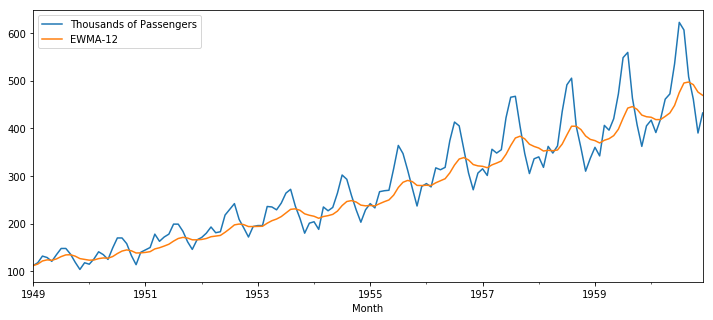

In [0]:
airline[['Thousands of Passengers', 'EWMA-12']].plot();
